In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

df=pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
#df.drop(['X1',],axis=1,inplace=True)

In [2]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


#**Column Significance:**
<ol>
X1 Relative Compactness<br>
X2 Surface Area<br>
X3 Wall Area<br>
X4 Roof Area<br>
X5 Overall Height<br>
X6 Orientation<br>
X7 Glazing Area<br>
X8 Glazing Area Distribution<br>
y1 Heating Load<br>
y2 Cooling Load<br>
</ol>

In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   bold = '\033[1m'
   ul = '\033[4m'
   end = '\033[0m'

# **Basic EDA of Dataset**

In [4]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [5]:
print("No. of unique values:")
for col in df.columns:
    print(f"{col}: %d"%len(df[col].unique()))

No. of unique values:
X1: 12
X2: 12
X3: 7
X4: 4
X5: 2
X6: 4
X7: 4
X8: 6
Y1: 587
Y2: 636


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


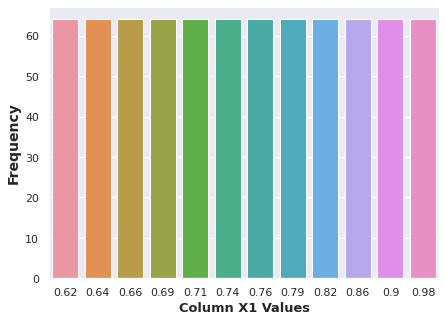

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


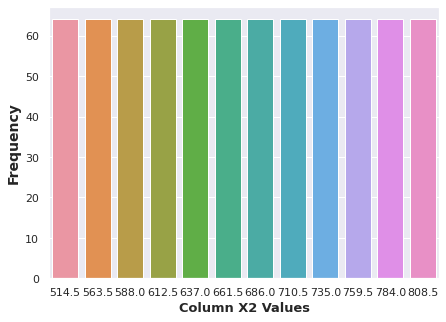

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


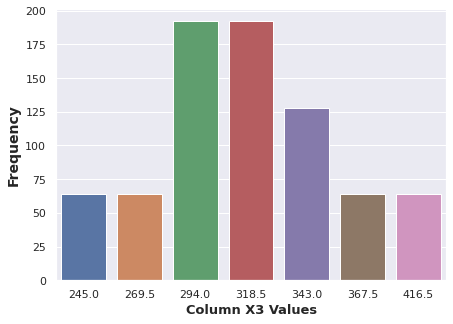

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


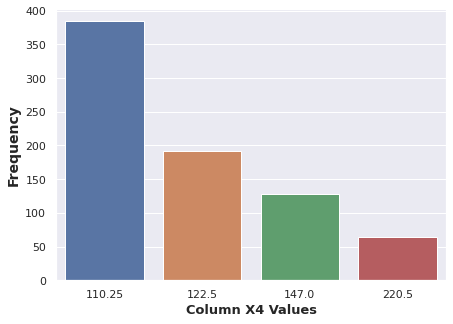

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


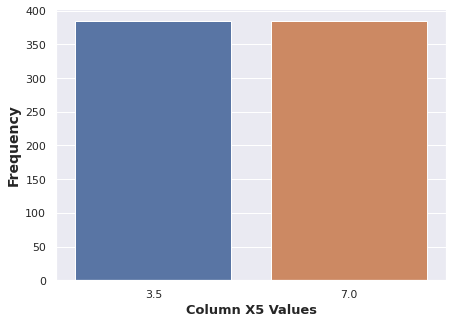

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


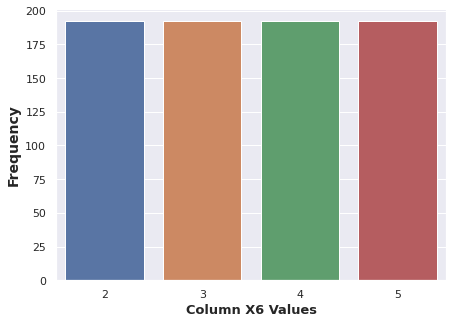

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


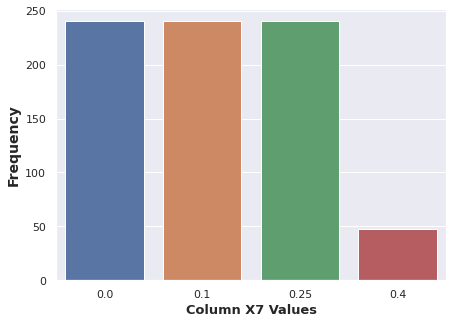

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


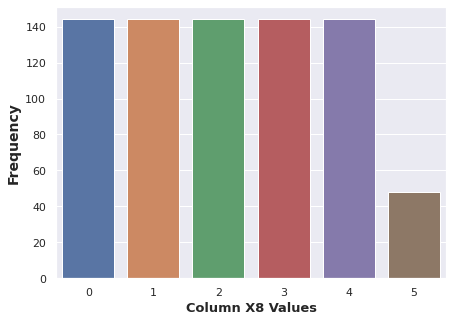

In [6]:
for col in df.columns:
    if not(col=='Y1' or col=='Y2'):
        plt.subplots(figsize=(7,5))
        sns.barplot(df[col].unique(),df[col].value_counts())
        plt.ylabel("Frequency", fontweight='bold', size=14)
        plt.xlabel("Column %s Values"%col, fontweight='bold',size=13)
        plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


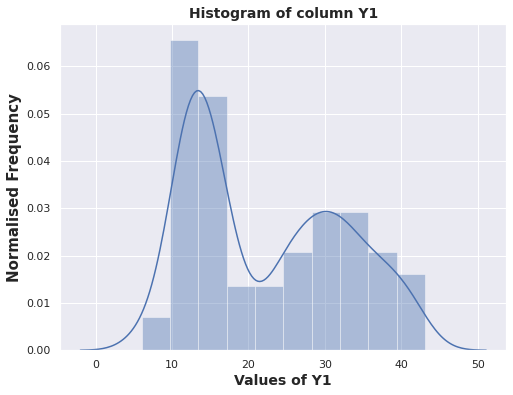

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


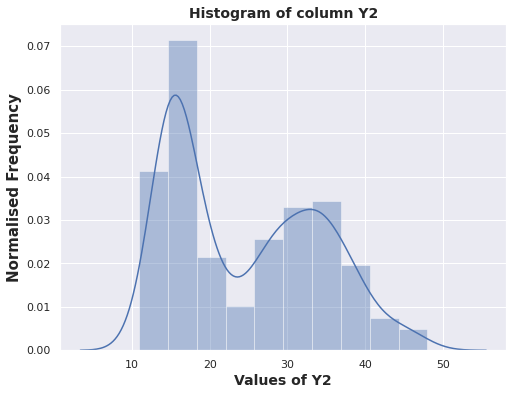

In [7]:
#Column Y1
plt.subplots(figsize=(8,6))
sns.distplot(df['Y1'])
plt.xlabel("Values of Y1", fontweight='bold', size=14)
plt.ylabel('Normalised Frequency',fontweight='bold', size=15)
plt.title("Histogram of column Y1", fontweight='bold', size=14)
plt.show();

#Column Y2
plt.subplots(figsize=(8,6))
sns.distplot(df['Y2'])
plt.xlabel("Values of Y2", fontweight='bold', size=14)
plt.ylabel('Normalised Frequency',fontweight='bold', size=15)
plt.title("Histogram of column Y2", fontweight='bold', size=14)
plt.show();

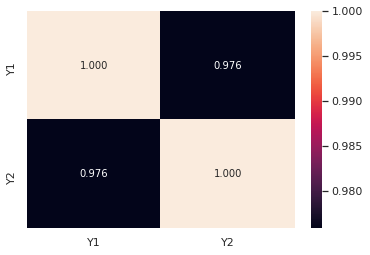

In [8]:
sns.heatmap(df[['Y1','Y2']].corr(), annot=True,fmt='.3f')
plt.show();

In [9]:
#Calculating Entropy for Each Categorical Column
print("Entropy is:")
for col in df.columns:
    if not(col=='Y1' or col=='Y2'):   
        f=df[col].value_counts()
        N=df[col].value_counts().sum()
        E=np.sum(-f/N*np.log(f/N))
        print(f"{col} : %f"%E)

Entropy is:
X1 : 2.484907
X2 : 2.484907
X3 : 1.820076
X4 : 1.198849
X5 : 0.693147
X6 : 1.386294
X7 : 1.263741
X8 : 1.742640


#**Preparing Data for Regression**

In [10]:
#Assigning Feature Vector 
X=df.drop(['Y1','Y2'], axis=1).to_numpy()
y1=df['Y1'].to_numpy().reshape(-1,1)
y2=df['Y2'].to_numpy().reshape(-1,1)

In [11]:
def split(X,y1,y2,train_ratio=0.8,seed=1):
    m,n=X.shape
    m_train= int(m*train_ratio) 
    m_test= m - m_train
    
    #To randomise the training
    np.random.seed(seed)
    a=np.random.permutation(m)
    
    #Training Matrices
    X_train= X[a[:m_train]]
    y1_train= y1[a[:m_train]]
    y2_train= y2[a[:m_train]]
    
    #Test  Matrices
    X_test= X[a[m_train:]]
    y1_test= y1[a[m_train:]]
    y2_test= y2[a[m_train:]]
    
    return X_train, y1_train, y2_train, X_test, y1_test, y2_test

In [12]:
X_train, y1_train, y2_train, X_test, y1_test, y2_test= split(X,y1,y2,0.8,1)

In [13]:
print(X_train.shape,X_test.shape)
print(y1_train.shape,y1_test.shape)
print(y2_train.shape,y2_test.shape)

(614, 8) (154, 8)
(614, 1) (154, 1)
(614, 1) (154, 1)


In [14]:
lambda_values=[0.001,0.005,0.01,0.05,0.1,0.5]
train_val=[0.8,0.6,0.7,0.9]

#**Linear, Ridge & Lasso Regression functions for proper printing of values**
I've used inbuilt sci-kit learn module in these functions to do the Regression. I've made these functions so the required values are properly displayed during the function call, when actual Regression computations begin

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

lin_model=LinearRegression()

def linRegression(X_train,y_train,X_test,y_test):
    
    #Training the Regression Model
    lin_model.fit(X_train,y_train)
    y_train_pred= lin_model.predict(X_train)
    
    #Getting the RMSE & R2 for training set
    rmse= np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2= r2_score(y_train, y_train_pred)

    print("1) Training Set:")
    print("  a) RMSE= %s"%rmse)
    print("  b) R2 Score= %s"%r2)

    #Test Set Y value prediction
    y_test_pred= lin_model.predict(X_test)
    rmse= np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2= r2_score(y_test, y_test_pred)
    
    #RMSE + R2 (for Test Set) + Intercept + Coefficients
    print("\n2) Test Set:")
    print("  a) RMSE= %s"%rmse)
    print("  b) R2 Score= %s"%r2)
    print("\n3) Intercept= %s"%lin_model.intercept_[0])
    print("\n4) Coefficients= %s"%lin_model.coef_[0])

    #Printing Predicted Y values on Test Set
    print("\nPredicted Y Values for Test Set =\n %s"%y_test_pred.T)


# **Linear Regression Begins**

##**Train-Test Ratio = 80:20**

In [16]:
print(color.bold+color.ul+"LINEAR REGRESSION MODEL"+color.end)

#for train_ratio in train_val:
X_train, y1_train, y2_train, X_test, y1_test, y2_test= split(X,y1,y2,train_val[0],seed=1)

#Heading 
print(color.bold+color.ul+"\n\nTRAIN-TEST SPLIT = %d:%d"\
        %(train_val[0]*100,100-train_val[0]*100)+color.end)

#Regression for Output Y1 (Heating Load)
print(color.bold+"\nOUTPUT Y1-"+color.end)
linRegression(X_train,y1_train,X_test,y1_test)

#Regression for Output Y2 (Cooling Load)
print(color.bold+"\nOUTPUT Y2-"+color.end)
linRegression(X_train,y2_train,X_test,y2_test)

LINEAR REGRESSION MODEL


TRAIN-TEST SPLIT = 80:20

OUTPUT Y1-
1) Training Set:
  a) RMSE= 2.9816982013397
  b) R2 Score= 0.9134036711614921

2) Test Set:
  a) RMSE= 2.673580990080559
  b) R2 Score= 0.9255905735135403

3) Intercept= 85.65724229042293

4) Coefficients= [-6.70586496e+01  5.94212630e+10 -5.94212630e+10 -1.18842526e+11
  4.26774645e+00 -3.56066599e-03  1.99205595e+01  1.98515330e-01]

Predicted Y Values for Test Set =
 [[40.73536729 19.09474229 16.38185167 11.57521104 31.04786729 11.75880479
  37.35255479 17.82130479 12.13575792 11.55958604 16.18263292 16.19044542
  15.99513292 31.04005479 31.00099229 11.95802354 33.59083604 31.77442979
   8.18067979 33.02442979 17.74317979 17.14161729 10.21388292 14.15333604
  27.80958604 14.74708604 40.33302354  8.57911729 17.34083604 32.06739854
  10.01075792 27.85255479 15.51075792 30.04786729 18.50099229 15.31544542
  25.26661729 12.72364854 13.20216417 16.10646104 26.66700792 36.20802354
  24.07130479  9.94044542 24.87208604 30.22364

##**Train-Test Ratio = 60:40**

In [17]:
print(color.bold+color.ul+"LINEAR REGRESSION MODEL"+color.end)

#for train_ratio in train_val:
X_train, y1_train, y2_train, X_test, y1_test, y2_test= split(X,y1,y2,train_val[1],seed=1)

#Heading 
print(color.bold+color.ul+"\n\nTRAIN-TEST SPLIT = %d:%d"\
        %(train_val[1]*100,100-train_val[1]*100)+color.end)

#Regression for Output Y1 (Heating Load)
print(color.bold+"\nOUTPUT Y1-"+color.end)
linRegression(X_train,y1_train,X_test,y1_test)

#Regression for Output Y2 (Cooling Load)
print(color.bold+"\nOUTPUT Y2-"+color.end)
linRegression(X_train,y2_train,X_test,y2_test)

LINEAR REGRESSION MODEL


TRAIN-TEST SPLIT = 60:40

OUTPUT Y1-
1) Training Set:
  a) RMSE= 2.9951974787513103
  b) R2 Score= 0.9100087015520261

2) Test Set:
  a) RMSE= 2.8089263061140315
  b) R2 Score= 0.9238880528586714

3) Intercept= 89.16303609165463

4) Coefficients= [-6.78289979e+01 -4.95246544e+11  4.95246544e+11  9.90493088e+11
  4.08603287e+00 -1.50087878e-01  2.06973937e+01  1.43331250e-01]

Predicted Y Values for Test Set =
 [[18.66303609 34.72553609 12.60053609  9.44428609 32.31928609 29.97553609
  13.88178609 33.75678609 18.72553609 31.00678609 24.66303609 13.56928609
  17.85053609 36.91303609  6.64741109 30.56928609 29.91303609 12.31928609
   8.86616109 18.25678609 22.47553609 31.00678609  5.16303609 11.78803609
  37.19428609  7.69428609 37.50678609 12.19428609 31.44428609  7.66303609
  13.16303609  9.97553609 16.22553609 33.38178609 29.75678609 11.47553609
  30.16303609 12.81928609 11.49116109 15.49116109  9.17866109 14.19428609
  14.60053609 37.19428609 12.69428609 10.8

##**Train-Test Ratio = 70:30**

In [18]:
print(color.bold+color.ul+"LINEAR REGRESSION MODEL"+color.end)

#for train_ratio in train_val:
X_train, y1_train, y2_train, X_test, y1_test, y2_test= split(X,y1,y2,train_val[2],seed=1)

#Heading 
print(color.bold+color.ul+"\n\nTRAIN-TEST SPLIT = %d:%d"\
        %(train_val[2]*100,100-train_val[2]*100)+color.end)

#Regression for Output Y1 (Heating Load)
print(color.bold+"\nOUTPUT Y1-"+color.end)
linRegression(X_train,y1_train,X_test,y1_test)

#Regression for Output Y2 (Cooling Load)
print(color.bold+"\nOUTPUT Y2-"+color.end)
linRegression(X_train,y2_train,X_test,y2_test)

LINEAR REGRESSION MODEL


TRAIN-TEST SPLIT = 70:30

OUTPUT Y1-
1) Training Set:
  a) RMSE= 2.9397448679014615
  b) R2 Score= 0.913469566216474

2) Test Set:
  a) RMSE= 2.8766143944957636
  b) R2 Score= 0.9216163576492895

3) Intercept= 94.95633405529884

4) Coefficients= [-7.03159805e+01  1.27969283e+12 -1.27969283e+12 -2.55938566e+12
  4.00692940e+00 -9.46869999e-02  1.98423148e+01  1.84245281e-01]

Predicted Y Values for Test Set =
 [[11.76883406 14.08133406 11.51883406 13.51883406 29.76883406 34.20633406
  25.39383406 28.76883406 37.76883406 12.83133406 14.20633406 15.70633406
  34.70633406  9.14383406 17.76883406 40.58133406 11.89383406 35.64383406
  27.64383406 27.83133406 31.83133406 33.89383406 27.45633406 30.51883406
  40.76883406 19.01883406 26.83133406 33.08133406 15.14383406  9.89383406
  10.33133406 29.83133406  5.95633406 29.95633406  8.45633406 14.64383406
  15.51883406  7.83133406 28.51883406 12.08133406 14.64383406  9.89383406
   7.26883406 12.95633406 27.20633406 33.95

##**Train-Test Ratio = 90:10**

In [19]:
print(color.bold+color.ul+"LINEAR REGRESSION MODEL"+color.end)

#for train_ratio in train_val:
X_train, y1_train, y2_train, X_test, y1_test, y2_test= split(X,y1,y2,train_val[3],seed=1)

#Heading 
print(color.bold+color.ul+"\n\nTRAIN-TEST SPLIT = %d:%d"\
        %(train_val[3]*100,100-train_val[3]*100)+color.end)

#Regression for Output Y1 (Heating Load)
print(color.bold+"\nOUTPUT Y1-"+color.end)
linRegression(X_train,y1_train,X_test,y1_test)

#Regression for Output Y2 (Cooling Load)
print(color.bold+"\nOUTPUT Y2-"+color.end)
linRegression(X_train,y2_train,X_test,y2_test)

LINEAR REGRESSION MODEL


TRAIN-TEST SPLIT = 90:10

OUTPUT Y1-
1) Training Set:
  a) RMSE= 2.920918055764936
  b) R2 Score= 0.9160622724257703

2) Test Set:
  a) RMSE= 2.9020650242750445
  b) R2 Score= 0.916848204052761

3) Intercept= 88.64397149359661

4) Coefficients= [-6.85521176e+01 -7.28894630e+11  7.28894630e+11  1.45778926e+12
  4.20915699e+00  2.00419836e-02  1.97819394e+01  2.01403379e-01]

Predicted Y Values for Test Set =
 [[14.20647149 34.26897149 35.76897149 18.98772149 26.67522149 37.01897149
  15.45647149 11.98772149  9.33147149 31.70647149 17.86272149 18.11272149
  12.67522149 14.76897149 12.36272149  5.67522149 27.73772149 29.55022149
  26.11272149 13.39397149 29.17522149 18.42522149 27.76897149  5.67522149
  34.36272149  9.70647149 33.33147149 13.64397149 35.01897149 15.73772149
  37.39397149 28.01897149 33.95647149 34.14397149 11.42522149 32.55022149
  15.83147149 30.98772149 15.51897149 32.95647149  8.64397149 30.17522149
  12.11272149 13.58147149 10.80022149 33.050

#**Ridge Regression Begins**
For Ridge Regression, the **problem statement only mentioned** that we had to display the **Root Mean Squared Error (RMSE)** and the $R^2$ Score for the fit for all the $\lambda$ values and the Test-Train splits. So have only done that!

In [20]:
def ridgeReg(X_train,y_train,X_test,y_test, lambda_):
    ridge_model=Ridge(alpha=lambda_)
    
    #Training Ridge Model with Training Set
    ridge_model.fit(X_train,y_train)
    y_train_pred= ridge_model.predict(X_train)
    
    #Calculating RMSE & R2 for the Training Set
    rmse= np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2= r2_score(y_train, y_train_pred)
    
    print("1) Training Set:")
    print("  a) RMSE= %s"%rmse)
    print("  b) R2 Score= %s"%r2)
    
    #Test Set Y value prediction
    y_test_pred= ridge_model.predict(X_test)
    rmse= np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2= r2_score(y_test, y_test_pred)
    
    print("\n2) Test Set:")
    print("  a) RMSE= %s"%rmse)
    print("  b) R2 Score= %s"%r2)

    #print("\n3) Intercept= ",end='')
    #print(lin_model.intercept_[0])

    #print("\n4) Coefficients= ",end='')
    #print(lin_model.coef_[0])
    

In [21]:
print(color.bold+color.ul+"RIDGE REGRESSION MODEL"+color.end)

for train_ratio in train_val:
    X_train, y1_train, y2_train, X_test, y1_test, y2_test= split(X,y1,y2,train_ratio,seed=1)
    
    #Printing Test-Train Split
    print(color.bold+color.ul+"\n\nTEST-TRAIN SPLIT = %d:%d"\
          %(train_ratio*100,100-train_ratio*100)+color.end)
    
    for lambda_ in lambda_values:  
        print(color.bold+color.ul+"\nLAMBDA Value = %s:"%lambda_+color.end)
        
        #Ridge Regression for Output Y1 (Heating Load)
        print(color.bold+"\nOUTPUT Y1-"+color.end)
        ridgeReg(X_train, y1_train, X_test, y1_test, lambda_=lambda_)

        #Ridge Regression for Output Y2 (Cooling Load)
        print(color.bold+"\nOUTPUT Y2-"+color.end)
        ridgeReg(X_train,y2_train,X_test,y2_test, lambda_=lambda_)

RIDGE REGRESSION MODEL


TEST-TRAIN SPLIT = 80:20

LAMBDA Value = 0.001:

OUTPUT Y1-
1) Training Set:
  a) RMSE= 2.981710150591364
  b) R2 Score= 0.9134029770849426

2) Test Set:
  a) RMSE= 2.6748794949768984
  b) R2 Score= 0.9255182776164411

OUTPUT Y2-
1) Training Set:
  a) RMSE= 3.2296150937170918
  b) R2 Score= 0.8854240365708593

2) Test Set:
  a) RMSE= 3.0125212329445112
  b) R2 Score= 0.8945652584381301

LAMBDA Value = 0.005:

OUTPUT Y1-
1) Training Set:
  a) RMSE= 2.9821032608784317
  b) R2 Score= 0.9133801415825712

2) Test Set:
  a) RMSE= 2.6735013999996067
  b) R2 Score= 0.9255950036498629

OUTPUT Y2-
1) Training Set:
  a) RMSE= 3.230024153858226
  b) R2 Score= 0.8853950105559509

2) Test Set:
  a) RMSE= 3.0127506487362763
  b) R2 Score= 0.8945491992545646

LAMBDA Value = 0.01:

OUTPUT Y1-
1) Training Set:
  a) RMSE= 2.9831227720944717
  b) R2 Score= 0.9133209048593547

2) Test Set:
  a) RMSE= 2.672701637848723
  b) R2 Score= 0.9256395126218339

OUTPUT Y2-
1) Training Set:
 

#**Lasso Regression Begins**
Again, for Lasso Regression, the **problem statement only mentioned** that we had to display the Root Mean Squared Error **(RMSE)** and the $R^2$ Score for the fit for all the $\lambda$ values and the Test-Train splits. So have only done that!

In [22]:
test_err1=test_err2= np.zeros((len(train_val), len(lambda_values)))

In [23]:
def lassoReg(X_train, y_train, X_test, y_test,lambda_,max_iter):
    lasso_model=Lasso(alpha= lambda_, max_iter=max_iter)
    
    #Training the Lasso Model on the Training Set
    lasso_model.fit(X_train,y_train)
    y_train_pred= lasso_model.predict(X_train)
    
    #Calculating RMSE & R2 for the training data
    rmse= np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2= r2_score(y_train, y_train_pred)
    
    print("1) Training Set:")
    print("  a) RMSE= %s"%rmse)
    print("  b) R2 Score= %s"%r2)
    
    #Predicting Y values for the Test Set
    y_test_pred= lasso_model.predict(X_test)
    rmse= np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2= r2_score(y_test, y_test_pred)
    
    print("\n2) Test Set:")
    print("  a) RMSE= %s"%rmse)
    print("  b) R2 Score= %s"%r2)

    return rmse

    #print("\n3) Intercept= ",end='')
    #print(lin_model.intercept_[0])

    #print("\n4) Coefficients= ",end='')
    #print(lin_model.coef_[0])

In [24]:
print(color.bold+color.ul+"LASSO REGRESSION MODEL"+color.end); i=0

for train_ratio in train_val:
    X_train, y1_train, y2_train, X_test, y1_test, y2_test= split(X,y1,y2,train_ratio,seed=1)
    
    #Printing Test-Train Split
    print(color.bold+color.ul+"\n\nTEST-TRAIN SPLIT = %d:%d"\
          %(train_ratio*100,100-train_ratio*100)+color.end)
    
    j=0
    for lambda_ in lambda_values:  
        #Printing Lambda Value (Regularisation Parameter)
        print(color.bold+color.ul+"\nLAMBDA Value = %s:"%lambda_+color.end)
        
        #Lasso Regression for Output Y1 (Heating Load)
        print(color.bold+"\nOUTPUT Y1-"+color.end)
        test_err1[i][j]= lassoReg(X_train, y1_train, X_test, y1_test,\
                                                 lambda_=lambda_, max_iter=1500)

        #Lasso Regression for Output Y2 (Cooling Load)
        print(color.bold+"\nOUTPUT Y2-"+color.end)
        test_err2[i][j]= lassoReg(X_train, y1_train, X_test, y1_test,\
                                                 lambda_=lambda_, max_iter=1500)
        j+=1
    i+=1

LASSO REGRESSION MODEL


TEST-TRAIN SPLIT = 80:20

LAMBDA Value = 0.001:

OUTPUT Y1-
1) Training Set:
  a) RMSE= 2.983244239077736
  b) R2 Score= 0.9133138459057975

2) Test Set:
  a) RMSE= 2.6724694157727997
  b) R2 Score= 0.925652433926865

OUTPUT Y2-
1) Training Set:
  a) RMSE= 2.983244239077736
  b) R2 Score= 0.9133138459057975

2) Test Set:
  a) RMSE= 2.6724694157727997
  b) R2 Score= 0.925652433926865

LAMBDA Value = 0.005:

OUTPUT Y1-
1) Training Set:
  a) RMSE= 3.01974083309633
  b) R2 Score= 0.9111798591770932

2) Test Set:
  a) RMSE= 2.6973001079595025
  b) R2 Score= 0.924264445835625

OUTPUT Y2-
1) Training Set:
  a) RMSE= 3.01974083309633
  b) R2 Score= 0.9111798591770932

2) Test Set:
  a) RMSE= 2.6973001079595025
  b) R2 Score= 0.924264445835625

LAMBDA Value = 0.01:

OUTPUT Y1-
1) Training Set:
  a) RMSE= 3.0601815879094216
  b) R2 Score= 0.9087849480323628

2) Test Set:
  a) RMSE= 2.733908886345631
  b) R2 Score= 0.9221946713938193

OUTPUT Y2-
1) Training Set:
  a) RMSE

Train-Test Split= 80:20


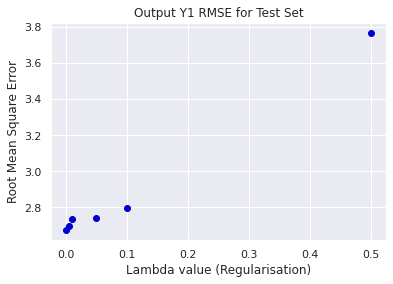

In [25]:
print('Train-Test Split= 80:20')
plt.scatter(lambda_values, test_err1[0],color='mediumblue',label='Test Error')
plt.title("Output Y1 RMSE for Test Set")
plt.xlabel('Lambda value (Regularisation)')
plt.ylabel('Root Mean Square Error')
plt.show()

Train-Test Split= 80:20


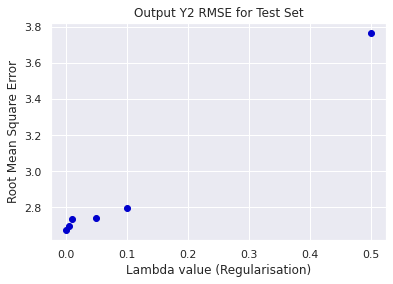

In [26]:
print('Train-Test Split= 80:20')
plt.scatter(lambda_values, test_err2[0],color='mediumblue',label='Test Error')
plt.title("Output Y2 RMSE for Test Set")
plt.xlabel('Lambda value (Regularisation)')
plt.ylabel('Root Mean Square Error')
plt.show()

#**Regression Accessory Functions from Scratch**

In [27]:
#Function also adds column of 1s to the matrix
def normalize(X):
    m,n=X.shape
    mu=np.mean(X,axis=0)
    std= np.std(X,axis=0)
    
    X= X- mu
    X= X/std
    X=np.concatenate((np.ones(m).reshape(-1,1), X), axis=1)
    
    return mu, std, X

In [28]:
#This is indifferent about the kind of regression being done.
#Because it uses only the y-labels and predicted y output
#Irrespective of the model.
def loss(y,y_pred):
    m,n=y.shape
    loss= ((y-y_pred)**2).sum()/m
    return loss

In [29]:
def r2Score(y, y_pred):
    m=y.shape[0]
    y_bar= np.mean(y)
    
    SST= np.sum((y-y_bar)**2)
    SSM= np.sum((y_pred-y_bar)**2)
    SSE= np.sum((y-y_pred)**2)

    r2= 1- SSE/SST

    return r2

#**Linear Regression from Scratch**

In [30]:
def linearReg(X,y):
    beta= np.dot(np.linalg.pinv(np.dot(X.T,X)), np.dot(X.T,y))
    prediction= np.dot(X, beta)
    
    return beta, prediction

In [31]:
def linRegPrint(X_train,y_train,X_test,y_test): 
    m_test=X_test.shape[0]
    
    #Training Model on Training Data
    mu,std,X1=normalize(X_train)
    beta, y_train_pred= linearReg(X1, y_train)

    rmse= np.sqrt(loss(y_train,y_train_pred))
    r2= r2Score(y_train, y_train_pred)

    print('1) Training Set:')
    print('a) RMSE = %s'%rmse)
    print('b) R2 Score = %s'%r2)

    #Test Set predictions begin
    X_test1= (X_test-mu)/std
    X_test1= np.concatenate((np.ones(m_test).reshape(-1,1), X_test1), axis=1)
    y_test_pred= np.dot(X_test1,beta)

    rmse= np.sqrt(loss(y_test,y_test_pred))
    r2= r2Score(y_test, y_test_pred)

    print('\n2) Test Set:')
    print('a) RMSE = %s'%rmse)
    print('b) R2 Score = %s'%r2)

In [32]:
#I've put Train Ratio =0.8 i.e Train-Test Split of 80:20
#You can change it if you want and check!

X_train, y1_train, y2_train, X_test, y1_test, y2_test= split(X,y1,y2,0.8,seed=1)
m_train=X_train.shape[0]
m_test= X_test.shape[0]

In [33]:
print(color.bold+'OUTPUT Y1'+color.end)
linRegPrint(X_train,y1_train, X_test, y1_test)

print(color.bold+'\nOUTPUT Y2'+color.end)
linRegPrint(X_train,y2_train, X_test, y2_test)

OUTPUT Y1
1) Training Set:
a) RMSE = 2.9816915902650427
b) R2 Score = 0.9134040551669291

2) Test Set:
a) RMSE = 2.6753569757921056
b) R2 Score = 0.9254916844426269

OUTPUT Y2
1) Training Set:
a) RMSE = 3.229595779652013
b) R2 Score = 0.8854254069638832

2) Test Set:
a) RMSE = 3.012565035948775
b) R2 Score = 0.894562192307369


#**Ridge Regression from Scratch**

In [34]:
def ridgeReg(X, y, lambda_=1):
    m,n=X.shape #X is augumenting with the ones matrix as well
    I= np.eye(n) #Because n includes the bias term as well
    L= I 
    L[0]= np.zeros(n)
    
    beta=np.dot(np.linalg.inv(np.dot(X.T,X)+lambda_*L), np.dot(X.T,y))
    y_pred= np.dot(X,beta)

    return beta, y_pred

In [35]:
def ridgeRegPrint(X_train,y_train,X_test,y_test,lambda_=0.1):
    #Ridge Regression on the Training set
    m_test=X_test.shape[0]

    mu, std, X1=normalize(X_train)
    beta, y_train_pred= ridgeReg(X1, y_train, lambda_)

    rmse= np.sqrt(loss(y_train,y_train_pred))
    r2= r2Score(y_train, y_train_pred)

    #Printing Properly
    print('1) Training Set:')
    print('a) RMSE = %s'%rmse)
    print('b) R2 Score = %s'%r2)

    #Linear Regression for Test Set begins
    m_test=len(X_test)
    X_test1= (X_test-mu)/std
    X_test1= np.concatenate((np.ones(m_test).reshape(-1,1),X_test1),axis=1)
    y_test_pred= np.dot(X_test1,beta)

    rmse= np.sqrt(loss(y_test,y_test_pred))
    r2= r2Score(y_test, y_test_pred)

    print('\n2) Test Set:')
    print('a) RMSE = %s'%rmse)
    print('b) R2 Score = %s'%r2)

In [36]:
#Loading the data with seed=1 same as all other data
X_train, y1_train, y2_train, X_test, y1_test, y2_test= split(X,y1,y2,0.8,seed=1)

print(color.bold+'OUTPUT Y1'+color.end)
ridgeRegPrint(X_train,y1_train, X_test, y1_test, lambda_=0.1)

print(color.bold+'\nOUTPUT Y2'+color.end)
ridgeRegPrint(X_train,y2_train, X_test, y2_test, lambda_=0.1)

OUTPUT Y1
1) Training Set:
a) RMSE = 2.9817335031626073
b) R2 Score = 0.9134016206344735

2) Test Set:
a) RMSE = 2.6744343954864345
b) R2 Score = 0.9255430630458551

OUTPUT Y2
1) Training Set:
a) RMSE = 3.2296381809880104
b) R2 Score = 0.8854223984463853

2) Test Set:
a) RMSE = 3.0124320859920246
b) R2 Score = 0.8945714984252363


#**Lasso Regression from Scratch**
I've used:-
<ul>
Train-Test Split= 80:20<br>
$\lambda$ (Regularization parameter) = 0.1<br>
$\alpha$ (gradient descent) = 0.03<br>
No. of iterations of Gradient Descent = 1000
</ul>

You can change these parameters as well!

In [37]:
def gradientDescent(X,y,beta,alpha, num_iters, lambda_):
    m,n=X.shape
    beta= beta.copy()
    J_history=[]
    
    for i in range(num_iters):
        beta[0] -= 2*alpha*np.sum(np.dot(X,beta)-y)/m
        beta[1:]-= 2*alpha*(np.matmul(X.T[1:,:], (np.dot(X,beta)-y)) + lambda_*(beta[1:]>=0))/m
        J_history.append(loss(y,np.dot(X,beta)))

    return beta, J_history

In [38]:
#Loading the data, using 1st seed, the same as all data!
X_train, y1_train, y2_train, X_test, y1_test, y2_test= split(X,y1,y2,0.8,seed=1)

#Lasso Regression begins!
mu, std, X1=normalize(X_train)
beta, J_history= gradientDescent(X1,y1_train,np.zeros((X1.shape[1],1)),\
                                 alpha=0.03, num_iters= 1000,lambda_= 0.1)

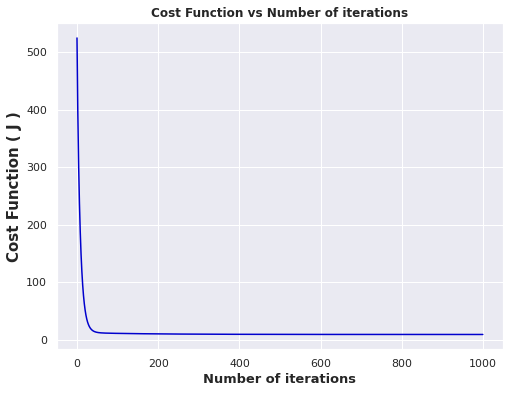

In [39]:
plt.subplots(figsize=(8,6))
plt.plot(J_history, color='mediumblue')
plt.xlabel("Number of iterations", fontweight='bold', size=13)
plt.ylabel("Cost Function ( J )", fontweight='bold', size=15)
plt.title("Cost Function vs Number of iterations", fontweight='bold')
plt.show();

This is for the output Y1 (Heating Load) for and 80:20 split with $\lambda= 0.1$ 

In [40]:
print(color.bold+"OUTPUT Y1"+color.end)

#Lasso Regression predictions for Training Set
y1_train_pred= np.dot(X1,beta) 
rmse= np.sqrt(loss(y1_train,y1_train_pred))
r2= r2Score(y1_train, y1_train_pred)

print('1) Training Set')
print('a) RMSE = %s'%rmse)
print('b) R2 Score = %s'%r2)

#Lasso Regression for Test Set begins
m_test=len(X_test)
X_test1= (X_test-mu)/std
X_test1= np.concatenate((np.ones(m_test).reshape(-1,1),X_test1),axis=1)
y1_test_pred= np.dot(X_test1,beta)

rmse= np.sqrt(loss(y1_test,y1_test_pred))
r2= r2Score(y1_test, y1_test_pred)

print('\n2) Test Set')
print('a) RMSE = %s'%rmse)
print('b) R2 Score = %s'%r2)

OUTPUT Y1
1) Training Set
a) RMSE = 2.9992926289148576
b) R2 Score = 0.9123786793575054

2) Test Set
a) RMSE = 2.682834242025858
b) R2 Score = 0.9250746208110449
